In [54]:
%matplotlib inline
# %matplotlib widget

import time
from IPython import display
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

**Volume of particles simulation**

In [55]:
# Lorenz's parameters 
sigma = 10
beta = 8 / 3
rho = 28

In [56]:
# Initial condition 1 - Large cube of data

cube_side = 5

xvec = np.arange(-cube_side, cube_side + 1, 2)
yvec = np.arange(-cube_side, cube_side + 1, 2)
zvec = np.arange(-cube_side, cube_side + 1, 2)
[x0, y0, z0] = np.meshgrid(xvec, yvec, zvec)

In [57]:
yIC = np.vstack([x0.ravel(), y0.ravel(), z0.ravel()]).T

In [58]:
dt = 0.1
duration = 4
tspan = [0, duration]
L = int(duration / dt)

In [59]:
def lorenzSYS(t, X):
    dxdt = sigma*(X[1] - X[0])
    dydt = X[0] * (rho - X[2]) - X[1]
    dzdt = X[0] * X[1] - beta*X[2]
    return np.array([dxdt, dydt, dzdt])

In [60]:
def lorenz3DSYS(t, X):
    dxdt = sigma*(X[:,1] - X[:,0])
    dydt = X[:,0] * (rho - X[:,2]) - X[:,1]
    dzdt = X[:,0] * X[:,1] - beta*X[:,2]
    return np.array([dxdt, dydt, dzdt]).T

In [61]:
def runge_kutta4_step(yk, f, tk,dt):
    f1 = f(tk, yk)
    f2 = f(tk + dt / 2, yk + dt / 2 * f1)
    f3 = f(tk + dt / 2, yk + dt / 2 * f2)
    f4 = f(tk + dt, yk + dt * f3)
    return yk + dt/6 * (f1 + 2 * f2 + 2 * f3 + f4)

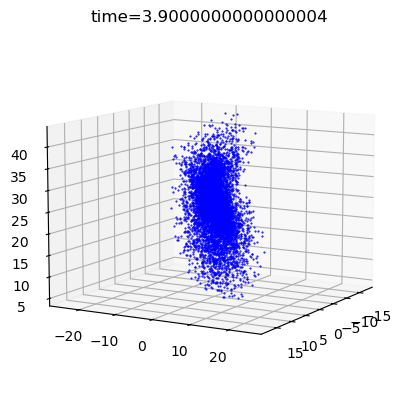

In [64]:
fig, ax = plt.subplots(subplot_kw={'projection':'3d'})
for time_step in range(L):
    sim_time = time_step * dt 
    ax.plot(yIC[:, 0], yIC[:, 1], yIC[:, 2], "bo", markersize=0.5)
    ax.set_title("time={}".format(sim_time))
    ax.view_init(elev=10., azim=30)
    display.display(fig)
    display.clear_output(wait=True)
    yIC = runge_kutta4_step(yIC, lorenz3DSYS, sim_time, dt)
